                                MEDICAL COST INSURANCE PROJECT

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_mc=pd.read_csv('medicalcost_insurance.csv')

In [3]:
df_mc

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
df_mc.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [7]:
df_mc.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [75]:
        #here we have seen that in our dataser there are three object type feature,2 float64 type feature and 2 int64 type feature




In [8]:
df_mc.shape

(1338, 7)

In [8]:
# seperating categorical and numerical feature and store in the list
categorical=[]
numerical=[]
for i in df_mc.columns:
    if df_mc[i].dtypes=='object':
        categorical.append(i)
    else:
        numerical.append(i)
print(categorical)
print(numerical)

['sex', 'smoker', 'region']
['age', 'bmi', 'children', 'charges']


In [9]:
categorical

['sex', 'smoker', 'region']

In [10]:
df_mc.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
            #here from the above output it is cleary indicates that there is no missing values are present in any feature

In [11]:
# no of unique values in each feature
df_mc.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [12]:
df_mc.value_counts()

age  sex     bmi     children  smoker  region     charges    
19   male    30.590  0         no      northwest  1639.56310     2
47   male    29.830  3         no      northwest  9620.33070     1
48   female  25.850  3         yes     southeast  24180.93350    1
             22.800  0         no      southwest  8269.04400     1
47   male    47.520  1         no      southeast  8083.91980     1
                                                                ..
31   female  25.740  0         no      southeast  3756.62160     1
             23.600  2         no      southwest  4931.64700     1
             21.755  0         no      northwest  4134.08245     1
30   male    44.220  2         no      southeast  4266.16580     1
64   male    40.480  0         no      southeast  13831.11520    1
Name: count, Length: 1337, dtype: int64

In [13]:
for i in df_mc.columns:
    print(df_mc[i].value_counts())
    

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64
sex
male      676
female    662
Name: count, dtype: int64
bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
charges
1639.56310     2
16884.92400    1
29330.98315   

<Axes: >

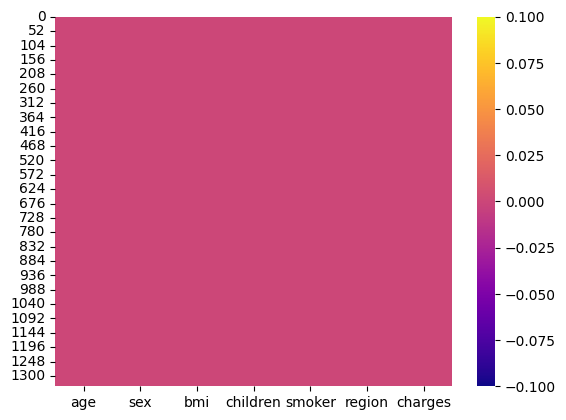

In [14]:
#checking for null valuse using heatmap()
sns.heatmap(df_mc.isnull(),cmap='plasma')

 here from the above heatmap it is clear that there are no null values are present in each independent fetaure and label feature

In [15]:
df_mc.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [16]:
df_mc.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


here from the above statistical summery it is clear that for the age column mean is little bit greater than median also in the bmi feature mean is bit greater than median
here in the age feature it shows few jumps from 75 percentile to max (higher fence ) so might be chance that outliers are present .
here in the bmi feature also same few jumps  from 75th percentile to higher fence indicate the presence outlier

In [86]:
#checking for outlier using boxplot 

<Axes: >

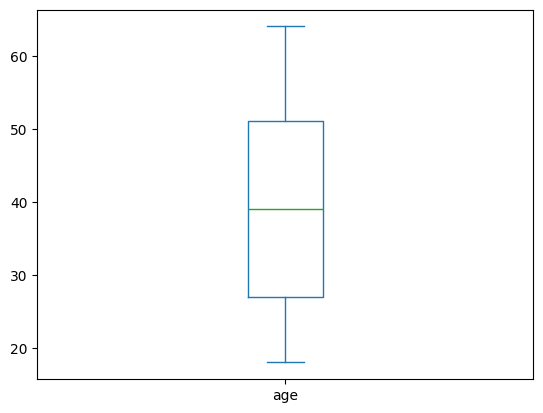

In [17]:
df_mc['age'].plot(kind='box')

<Axes: >

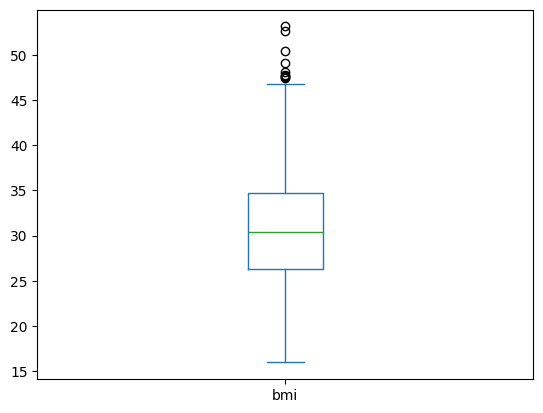

In [17]:
df_mc['bmi'].plot(kind='box')

<Axes: >

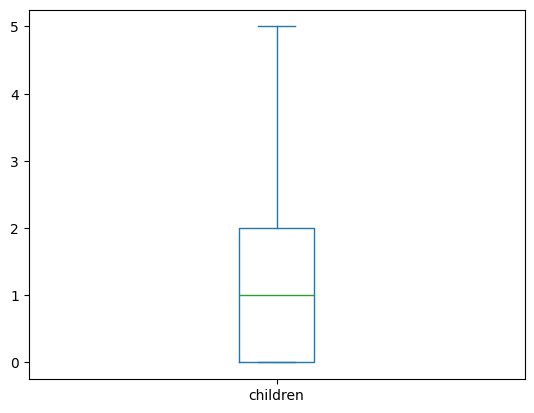

In [18]:
df_mc['children'].plot(kind='box')

<Axes: >

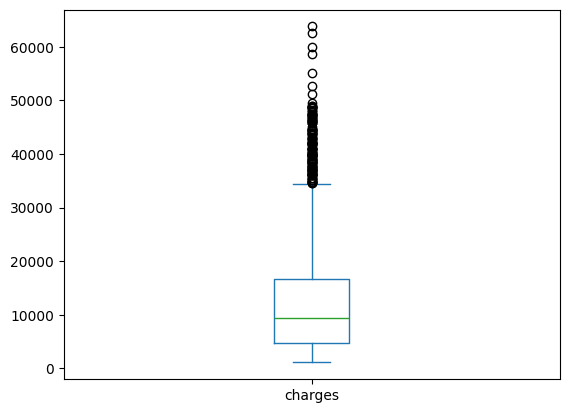

In [19]:
df_mc['charges'].plot(kind='box')

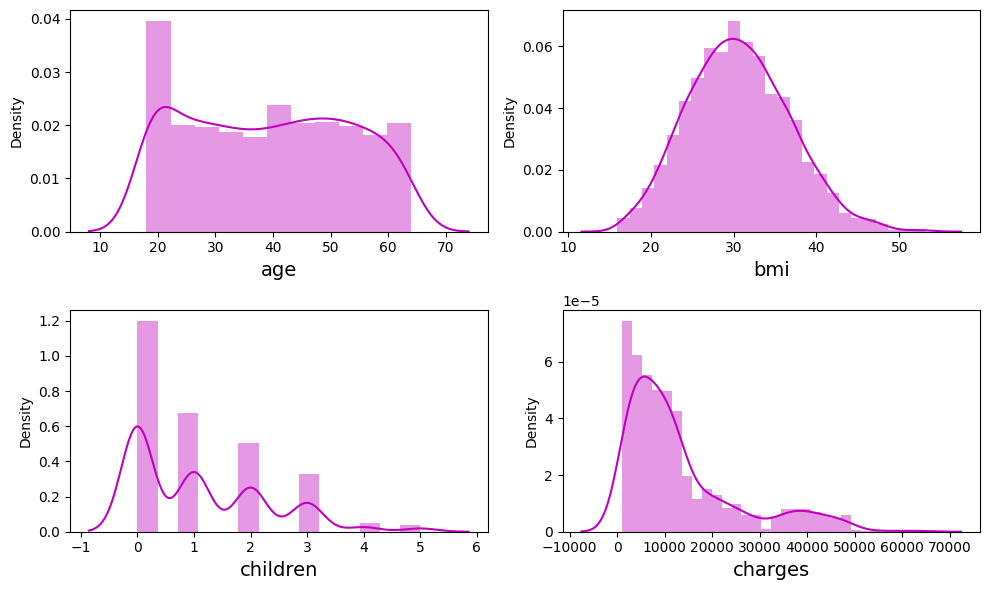

In [20]:
# checking the distribution of data in each numerical fetaure 
plt.figure(figsize=(10,6),facecolor='white')
counter=1
for i in numerical:
    ax=plt.subplot(2,2,counter)
    sns.distplot(df_mc[i],color='m')
    plt.xlabel(i,fontsize=14)
    counter+=1
plt.tight_layout()

here in the above distribution of data it is cleary indicates that in the age feature data is not normally distributed and having high spread in this column(high variance) . In charges feature there is positive skewness is there 

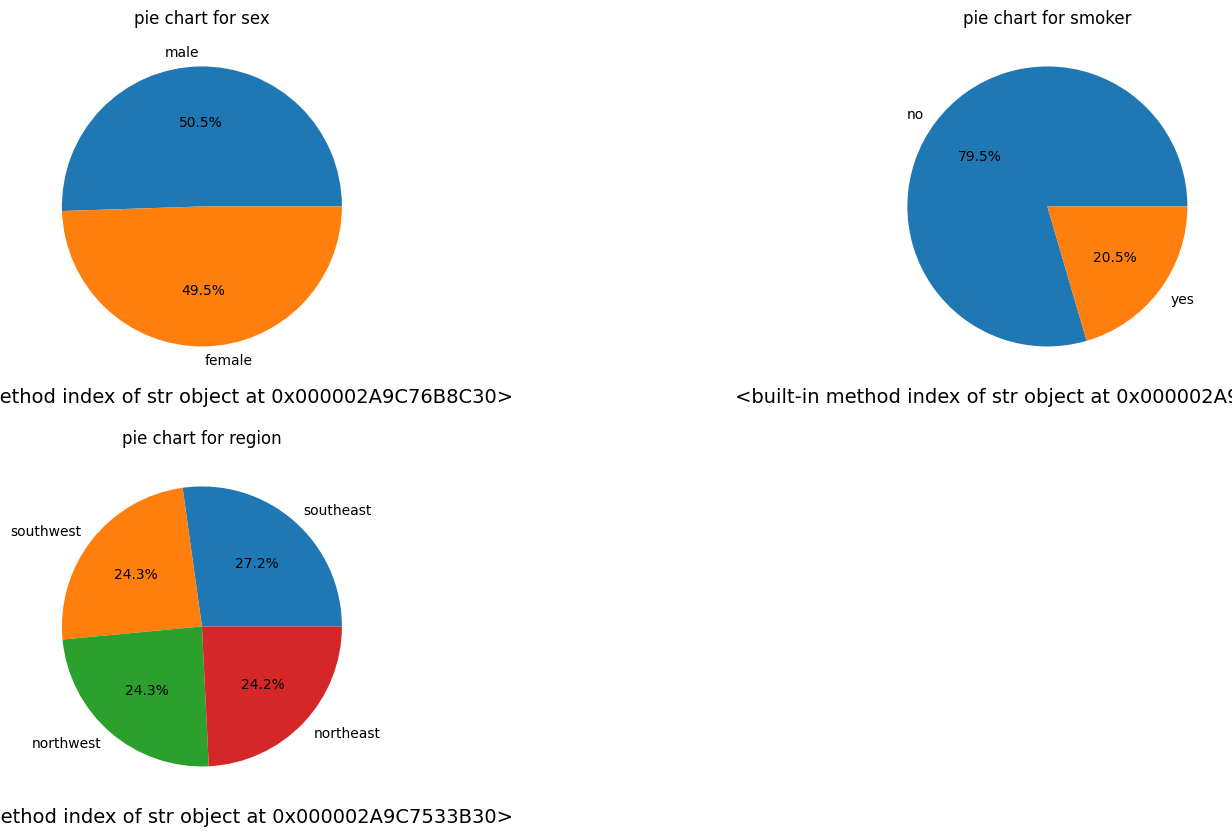

<Figure size 640x480 with 0 Axes>

In [21]:

plt.figure(figsize=(20,10),facecolor='white')
counter=1
for i in categorical:
    ax=plt.subplot(2,2,counter)
    plt.pie(df_mc[i].value_counts().values,labels=df_mc[i].value_counts().index,autopct='%1.1f%%')
    plt.xlabel(i.index,fontsize=14)
    plt.title(f"pie chart for {i}")

    counter+=1
plt.show()
plt.tight_layout()

here from the above pie chart for the categorical columns it is clear that data is sex feature is equally distributed in proportion 
here in smoker feature it is clear that the no of smoker is 20% and non  smoker is 80%
here in region feature it is clear that equal percentage of benificiary is residing in northeast ,northwest and southwest region and in the southeast 3-4% benificiary are more from this residential area

In [22]:
for i in categorical:
    print(df_mc[i].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


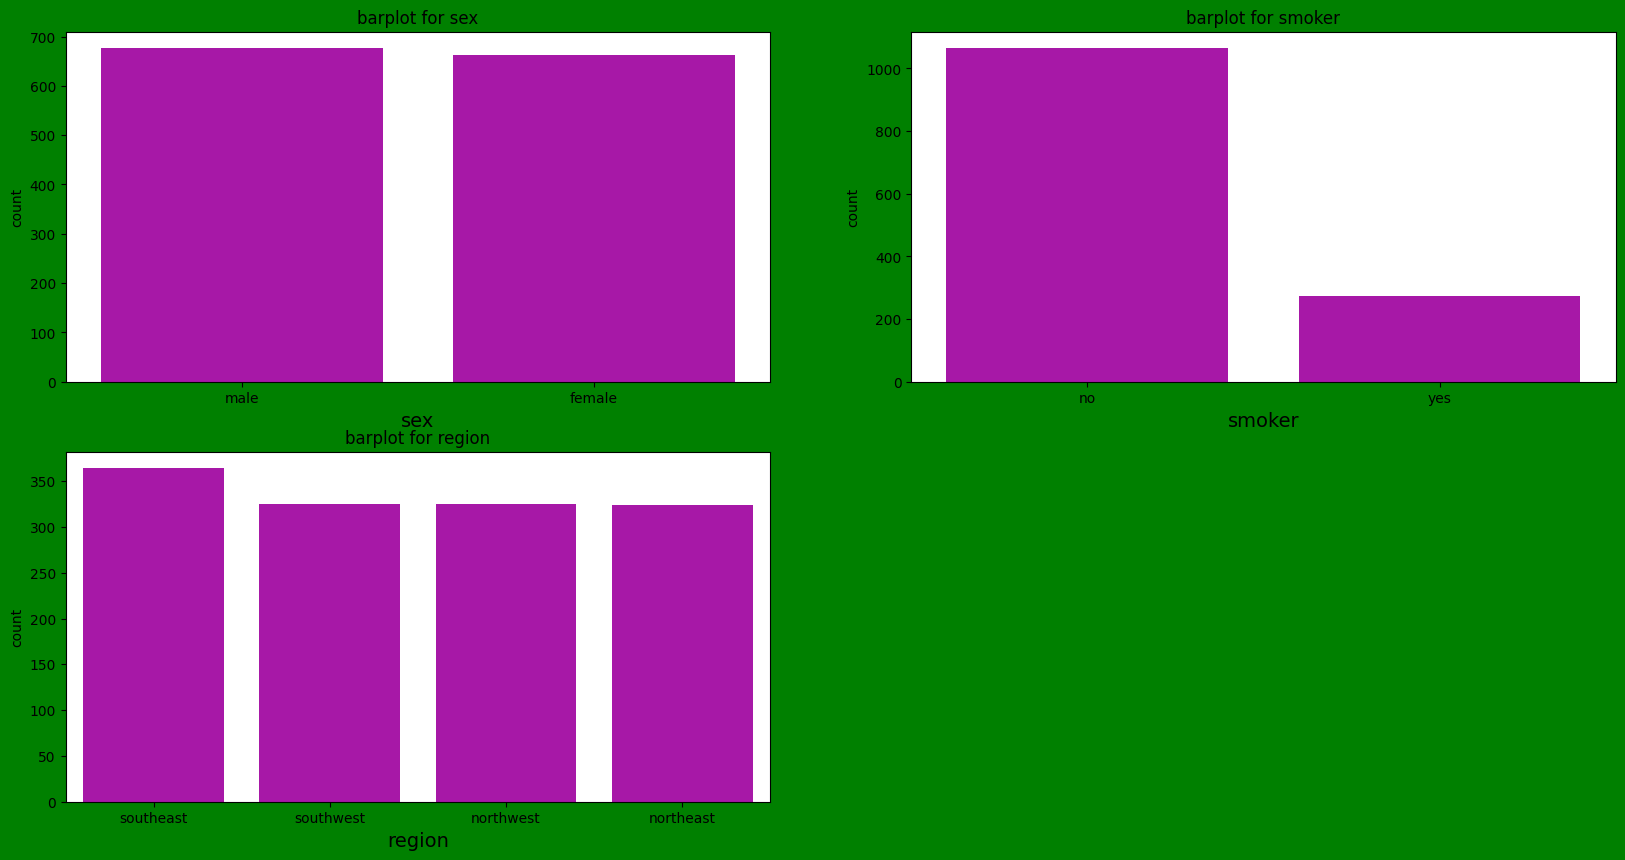

<Figure size 640x480 with 0 Axes>

In [23]:
plt.figure(figsize=(20,10),facecolor='green')
counter=1
for i in categorical:
    ax=plt.subplot(2,2,counter)
    sns.barplot(df_mc[i].value_counts(),color='m')
    plt.xlabel(i,fontsize=14)
    plt.title(f"barplot for {i}")

    counter+=1
plt.show()
plt.tight_layout()

In [ ]:
here from the above bar plot for the categorical columns it is clear that data is sex feature is equally distributed in proportion 
here in smoker feature it is clear that the no of smoker is 20% and non  smoker is 80%
here in region feature it is clear that equal percentage of benificiary is residing in northeast ,northwest and southwest region and in the southeast 3-4% benificiary are more from this residential area

In [29]:
df_mc['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

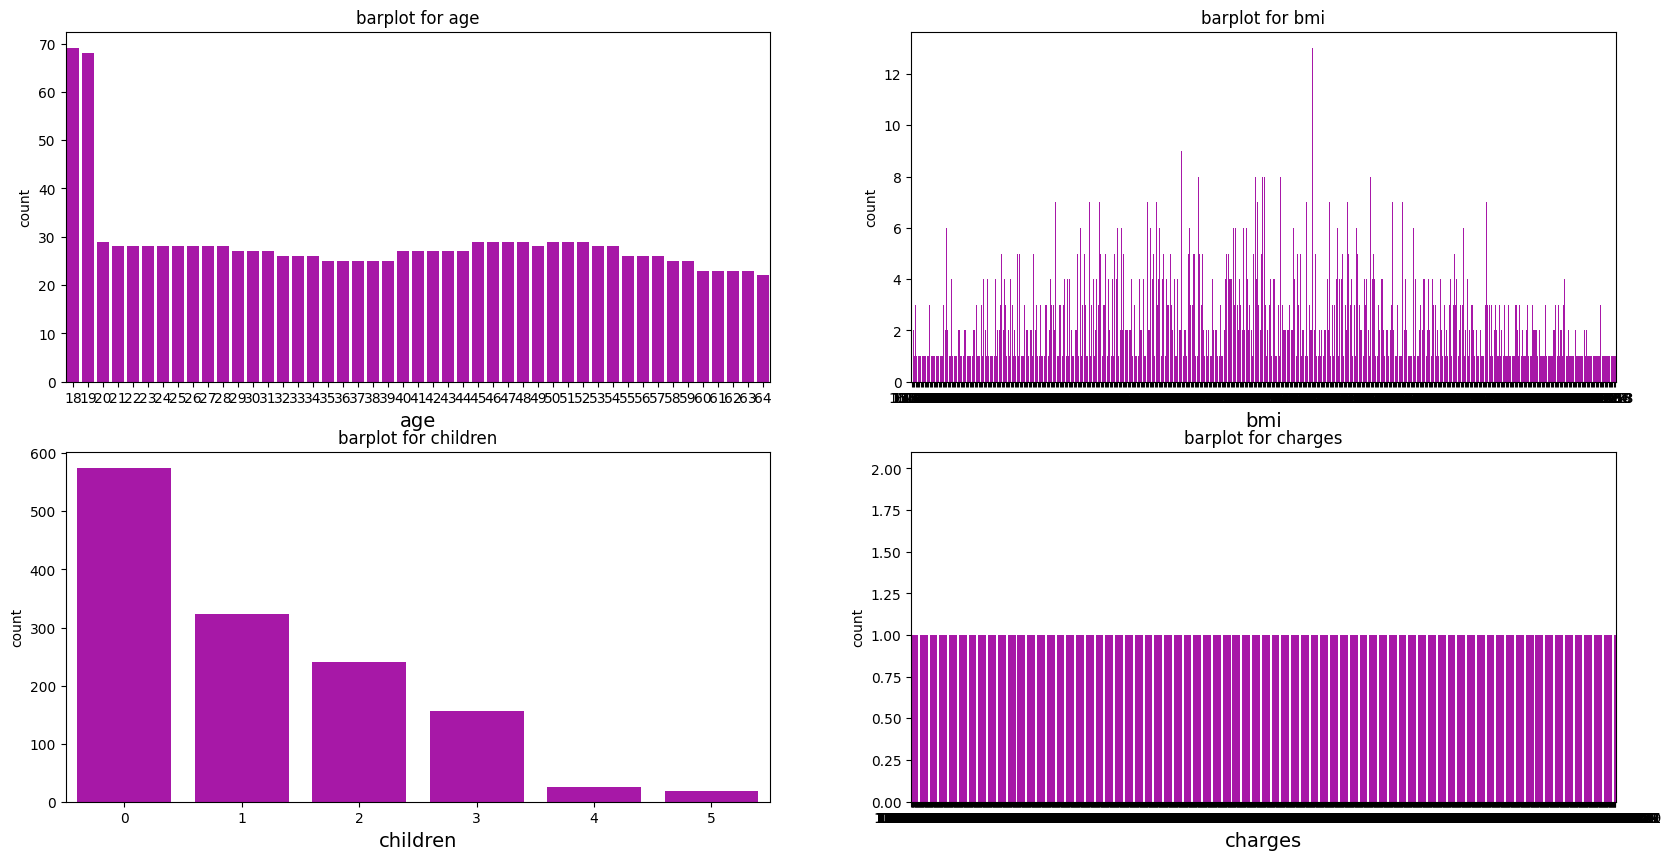

<Figure size 640x480 with 0 Axes>

In [30]:
plt.figure(figsize=(20,10),facecolor='white')
counter=1
for i in numerical:
    ax=plt.subplot(2,2,counter)
    sns.barplot(df_mc[i].value_counts(),color='m')
    plt.xlabel(i,fontsize=14)
    plt.title(f"barplot for {i}")

    counter+=1
plt.show()
plt.tight_layout()

In [ ]:
here from the above observation that we got from the barplot is the maximum number of   benificiery is from the age of 18 years and 19 years
here from the children feature there is one very important insight is that the benificiery without covered of  chidlren are more in numbers as compared to the benificiery along with medical coverage of 1 children .
here one more insight i am getting is that as the number of chilren increases benifienciary count is reducing

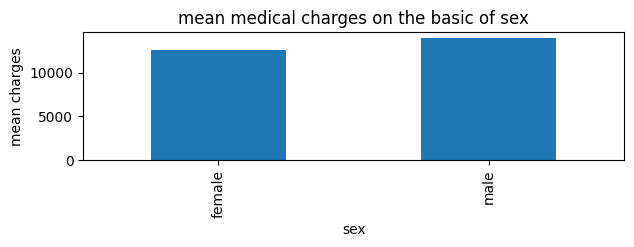

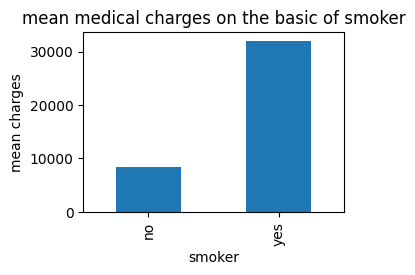

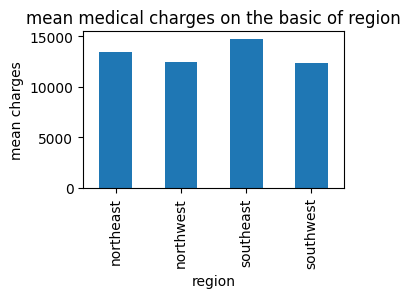

In [31]:
plt.figure(figsize=(12,4))
counter=1
for  i in  categorical:
    if counter<=4:
        ax=plt.subplot(2,2,counter)
        mean_charges=df_mc.groupby([i])['charges'].mean()
        mean_charges.plot(kind='bar')
        plt.title(f'mean medical charges on the basic of {i}')
        plt.ylabel('mean charges')
        
        plt.tight_layout()
        plt.show()
    

key observation:
from the above insights we clearly understood that male benificiery has highest premium than female benificiery but the difference is not too much.
The insights that i got for the smoker feature is that the benificiery who is addicted of smoking have higher premium as compared to the benificiery who is non smoker.
The insights that i got for the region feature is that the benificiery who is rediding in the southeast region has higher premium

In [32]:
df_mc

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


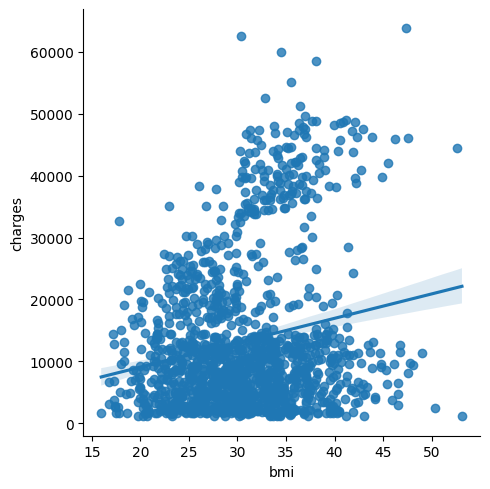

In [33]:
sns.lmplot(data=df_mc,x='bmi',y='charges')

In [ ]:
# from the above observation of lmplot betweem bmi and cahrges that is not having high linear relationship between this two feature 

<Axes: xlabel='age', ylabel='bmi'>

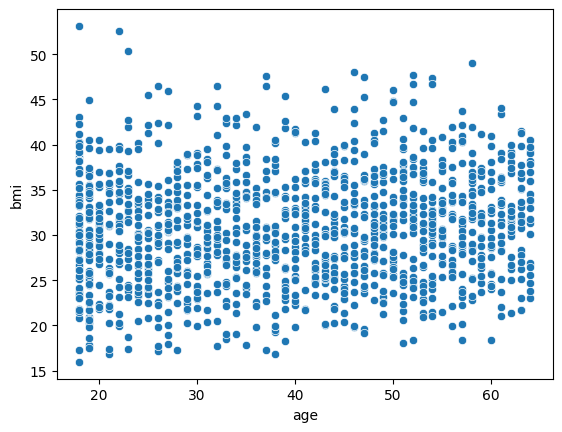

In [34]:
sns.scatterplot(x='age',y='bmi',data=df_mc)

In [ ]:
here from the above observation it shows the positive correaltiion between age and bmi

<Axes: xlabel='age', ylabel='charges'>

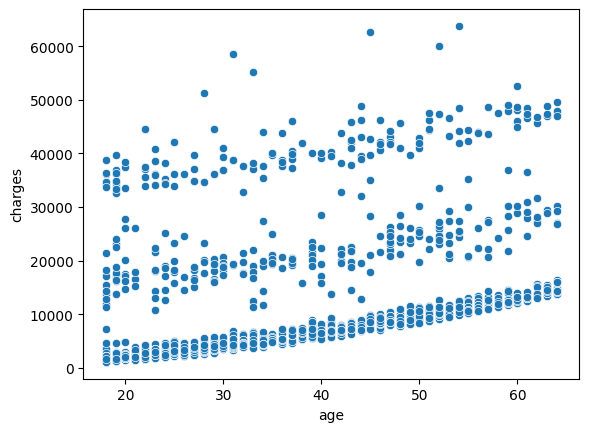

In [35]:
sns.scatterplot(x='age',y='charges',data=df_mc)

here from the above observation it is clear that there is a positive corelation between age and charges if the age increase the premium for the health insurance also increases

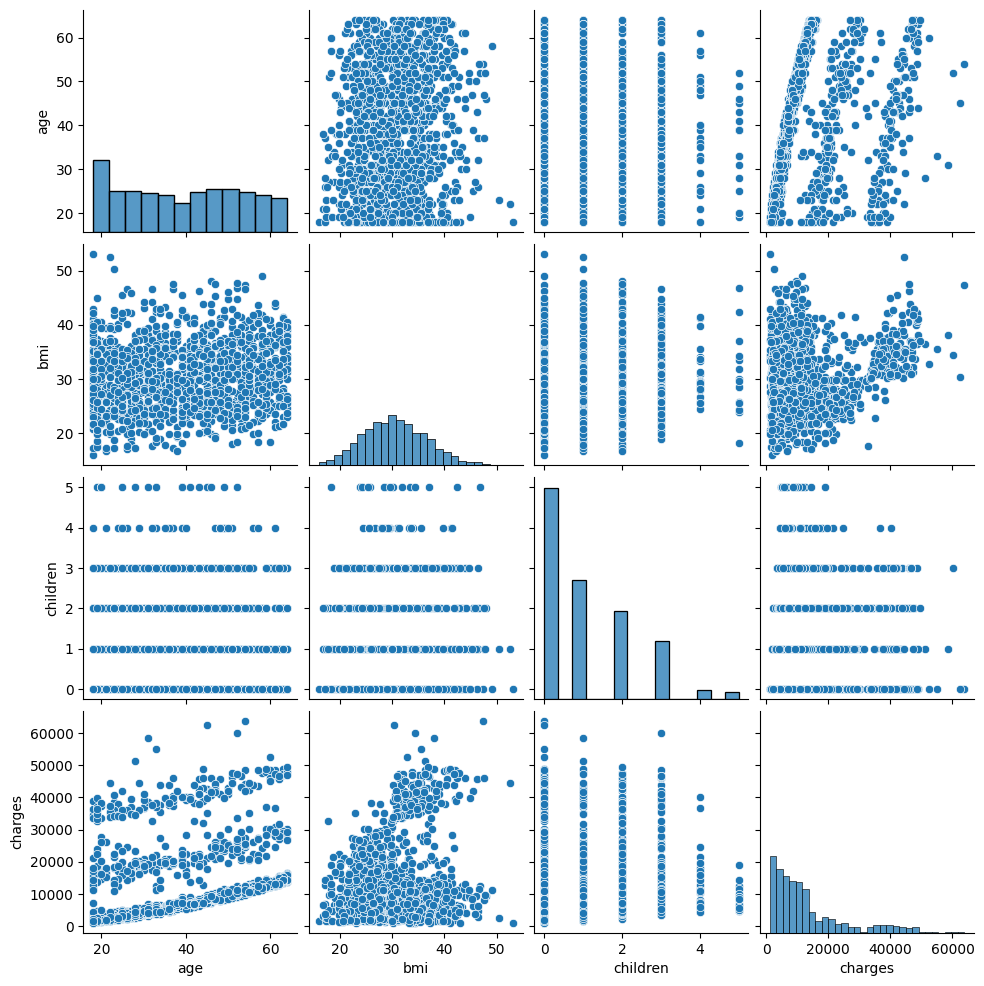

In [36]:
sns.pairplot(df_mc)

In [38]:
df_mc.shape

(1338, 7)

In [51]:
correlation=df_mc.corr()
correlation.dtypes

age         float64
sex         float64
bmi         float64
children    float64
smoker      float64
region      float64
charges     float64
dtype: object

<Axes: >

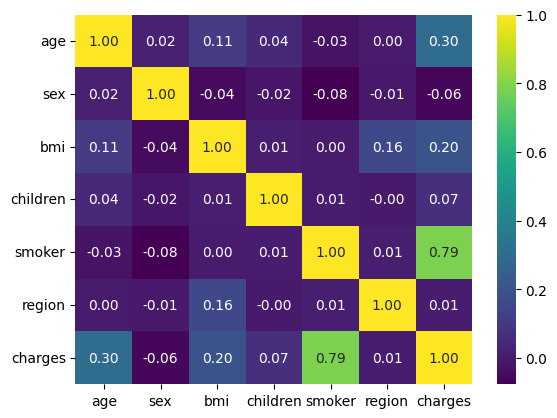

In [109]:
sns.heatmap(correlation,annot=True,cmap='viridis',fmt='.2f')

In [52]:
correlation['charges'].sort_values(ascending=False).drop('charges')

smoker      0.787251
age         0.299008
bmi         0.198999
children    0.067998
region      0.011741
sex        -0.057292
Name: charges, dtype: float64

here from the above observation it is clearly onserved that smoker is highly correlated with target feature and other feature such as age,bmi,chilren,region is positively correlated with target feature.
feature sex has negative corelation with the target feature charges and doesnt impact our target feature 

In [ ]:
# removing outlier form bmi column as outlier is present in only one independent feature is bmi

In [37]:
Q1=df_mc['bmi'].quantile(0.25)
Q2=df_mc['bmi'].quantile(0.5)
Q3=df_mc['bmi'].quantile(0.75)
iqr=Q3-Q1
lowfence=Q1-1.5*iqr
uppfence=Q3+1.5*iqr
print(lowfence)
print(uppfence)


13.7
47.290000000000006


<Axes: ylabel='bmi'>

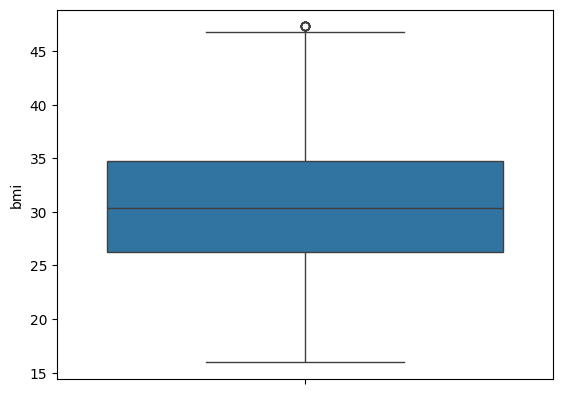

In [40]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.7},max_capping_dict={'bmi':47.30})
df_mc[['bmi']]=arb.fit_transform(df_mc[['bmi']])
sns.boxplot(df_mc['bmi'])


In [41]:
df_mc.shape

(1338, 7)

<Axes: >

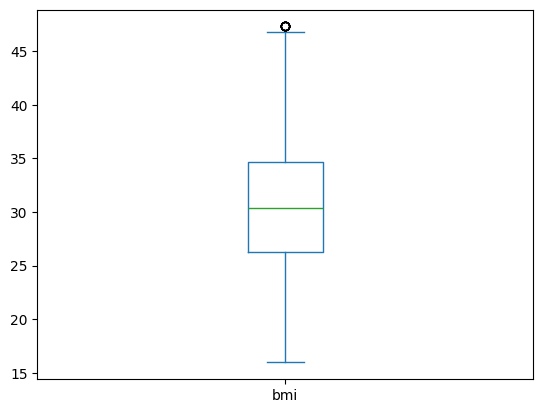

In [42]:
df_mc['bmi'].plot(kind='box')

In [43]:
df_mc['sex']=df_mc['sex'].map({'male':0,'female':1})
df_mc['smoker']=df_mc['smoker'].map({'yes':1,'no':0})
df_mc['region']=df_mc['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})


In [46]:
df_mc

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


In [ ]:
# here i am separating independent feature and target feature

In [44]:
x=df_mc.iloc[:,0:6]


In [45]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,3
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,0
4,32,0,28.880,0,0,0
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0
1334,18,1,31.920,0,0,1
1335,18,1,36.850,0,0,2
1336,21,1,25.800,0,0,3


In [46]:
y=df_mc.iloc[:,-1]

In [50]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaled_data_x=StandardScaler()

In [89]:

y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [52]:
x=pd.DataFrame(scaled_data_x.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.438764,1.010519,-0.454198,-0.908614,1.970587,1.343746
1,-1.509965,-0.989591,0.515273,-0.078767,-0.507463,0.438898
2,-0.797954,-0.989591,0.388102,1.580926,-0.507463,0.438898
3,-0.441948,-0.989591,-1.312189,-0.908614,-0.507463,-1.370796
4,-0.513149,-0.989591,-0.292344,-0.908614,-0.507463,-1.370796
...,...,...,...,...,...,...
1333,0.768473,-0.989591,0.052834,1.580926,-0.507463,-1.370796
1334,-1.509965,1.010519,0.209733,-0.908614,-0.507463,-0.465949
1335,-1.509965,1.010519,1.023956,-0.908614,-0.507463,0.438898
1336,-1.296362,1.010519,-0.801028,-0.908614,-0.507463,1.343746


In [53]:
from sklearn.preprocessing import StandardScaler

y = df_mc['charges'].values.reshape(-1, 1)  
scaler = StandardScaler()
y_standardized = scaler.fit_transform(y)


In [54]:
y=y_standardized

In [56]:
y

array([[ 0.2985838 ],
       [-0.95368917],
       [-0.72867467],
       ...,
       [-0.96159623],
       [-0.93036151],
       [ 1.31105347]])

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
vif=pd.DataFrame()
vif['values']=[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]

In [59]:
vif['features']=x.columns

In [60]:
vif

,values,features
0,1.015919,age
1,1.008735,sex
2,1.040788,bmi
3,1.002269,children
4,1.006614,smoker
5,1.025611,region


here from the above observation for the multi collinearity we checked that all the feature have vif values in their acceptable ranges -5 to 5so multi collinearity is not present in any feature

In [166]:
#x.drop('sex',axis=1,inplace=True)

In [61]:
vif=pd.DataFrame()
vif['values']=[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif['features']=x.columns

In [62]:
vif

,values,features
0,1.015919,age
1,1.008735,sex
2,1.040788,bmi
3,1.002269,children
4,1.006614,smoker
5,1.025611,region


In [63]:
x.skew()

age         0.055673
sex         0.020951
bmi         0.232704
children    0.938380
smoker      1.464766
region     -0.037853
dtype: float64

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [65]:
mxac=0
mxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>mxac:
        mxac=acc
        mxrs=i
print('maximum r2 score is',mxac,'at random state',mxrs)

maximum r2 score is 0.8029321724483554 at random state 112


In [66]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
pred_train=lr.predict(x_train)
print('R2_score',r2_score(y_test,pred_test)*100)
print('R2 score on training data',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_test))
print('Mean Squared  Error',mean_squared_error(y_test,pred_test))
print('Root Mean Absolute Error',np.sqrt(mean_squared_error(y_test,pred_test)))
print('cross validation score',cross_val_score(lr,x,y,cv=5,scoring='r2').mean()*100)

R2_score 71.72073527473286
R2 score on training data 76.17557262758208
Mean Absolute Error 0.3339998626250238
Mean Squared  Error 0.25307398527273917
Root Mean Absolute Error 0.5030645935391788
cross validation score 74.71923743727461


In [67]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbrpred_test=gbr.predict(x_test)
gbrpred_train=gbr.predict(x_train)
print('R2_score',r2_score(y_test,gbrpred_test))
print('R2 score on training data',r2_score(y_train,gbrpred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,gbrpred_test))
print('Mean Squared  Error',mean_squared_error(y_test,gbrpred_test))
print('Root Mean Absolute Error',np.sqrt(mean_squared_error(y_test,gbrpred_test)))
print('cross validation score',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean()*100)

R2_score 0.8239532241834779
R2 score on training data 91.413690363523
Mean Absolute Error 0.213375337873757
Mean Squared  Error 0.1575460309280826
Root Mean Absolute Error 0.3969206859412628
cross validation score 85.50654947523523


In [68]:
ridge=Ridge()
ridge.fit(x_train,y_train)
rdpred_test=ridge.predict(x_test)
rdpred_train=ridge.predict(x_train)
print('R2_score',r2_score(y_test,rdpred_test)*100)
print('R2 score on training data',r2_score(y_train,rdpred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,rdpred_test))
print('Mean Squared  Error',mean_squared_error(y_test,rdpred_test))
print('Root Mean Absolute Error',np.sqrt(mean_squared_error(y_test,rdpred_test)))
print('cross validation score',cross_val_score(ridge,x,y,cv=5,scoring='r2').mean()*100)

R2_score 71.73038921040333
R2 score on training data 76.1754890245112
Mean Absolute Error 0.33401521157657094
Mean Squared  Error 0.2529875912311179
Root Mean Absolute Error 0.5029787184674098
cross validation score 74.71969592114962


In [69]:
svr=SVR()
svr.fit(x_train,y_train)
svrpred_test=svr.predict(x_test)
svrpred_train=svr.predict(x_train)
print('R2_score',r2_score(y_test,svrpred_test)*100)
print('R2 score on training data',r2_score(y_train,svrpred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,svrpred_test))
print('Mean Squared  Error',mean_squared_error(y_test,svrpred_test))
print('Root Mean Absolute Error',np.sqrt(mean_squared_error(y_test,svrpred_test)))
print('cross validation score',cross_val_score(svr,x,y,cv=5,scoring='r2').mean()*100)

R2_score 81.2409622826702
R2 score on training data 87.29290494885028
Mean Absolute Error 0.21541856026229128
Mean Squared  Error 0.1678765159252717
Root Mean Absolute Error 0.4097273678011657
cross validation score 84.08384855049995


In [70]:
dct=DecisionTreeRegressor()
dct.fit(x_train,y_train)
dctpred_test=dct.predict(x_test)
dctpred_train=dct.predict(x_train)
print('R2_score',r2_score(y_test,dctpred_test)*100)
print('R2 score on training data',r2_score(y_train,dctpred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,dctpred_test))
print('Mean Squared  Error',mean_squared_error(y_test,dctpred_test))
print('Root Mean Absolute Error',np.sqrt(mean_squared_error(y_test,dctpred_test)))
print('cross validation score',cross_val_score(dct,x,y,cv=5,scoring='r2').mean()*100)

R2_score 62.11131888528758
R2 score on training data 100.0
Mean Absolute Error 0.2699311697215504
Mean Squared  Error 0.3390696193688841
Root Mean Absolute Error 0.5822968481529709
cross validation score 70.8659436394338


In [71]:
etr=ExtraTreesRegressor()

etr.fit(x_train,y_train)
etrpred_test=etr.predict(x_test)
etrpred_train=etr.predict(x_train)
print('R2_score',r2_score(y_test,etrpred_test)*100)
print('R2 score on training data',r2_score(y_train,etrpred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,etrpred_test))
print('Mean Squared  Error',mean_squared_error(y_test,etrpred_test))
print('Root Mean Absolute Error',np.sqrt(mean_squared_error(y_test,etrpred_test)))
print('cross validation score',cross_val_score(etr,x,y,cv=5,scoring='r2').mean()*100)

R2_score 77.70402197519802
R2 score on training data 100.0
Mean Absolute Error 0.23403914759509314
Mean Squared  Error 0.1995289505970969
Root Mean Absolute Error 0.44668663579415147
cross validation score 81.99400103184962


In [73]:
knn=KNeighborsRegressor()

knn.fit(x_train,y_train)
knnpred_test=knn.predict(x_test)
knnpred_train=knn.predict(x_train)
print('R2_score',r2_score(y_test,knnpred_test)*100)
print('R2 score on training data',r2_score(y_train,knnpred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,knnpred_test))
print('Mean Squared  Error',mean_squared_error(y_test,knnpred_test))
print('Root Mean Absolute Error',np.sqrt(mean_squared_error(y_test,knnpred_test)))
print('cross validation score',cross_val_score(knn,x,y,cv=5,scoring='r2').mean()*100)

R2_score 77.52779628348533
R2 score on training data 88.33981094234342
Mean Absolute Error 0.2655116854896785
Mean Squared  Error 0.2011060120427337
Root Mean Absolute Error 0.4484484497049061
cross validation score 80.91739083812091


In [74]:
rfr=RandomForestRegressor()

rfr.fit(x_train,y_train)
rfrpred_test=rfr.predict(x_test)
rfrpred_train=rfr.predict(x_train)
print('R2_score',r2_score(y_test,rfrpred_test)*100)
print('R2 score on training data',r2_score(y_train,rfrpred_train)*100)
print('Mean Absolute Error',mean_absolute_error(y_test,rfrpred_test))
print('Mean Squared  Error',mean_squared_error(y_test,rfrpred_test))
print('Root Mean Absolute Error',np.sqrt(mean_squared_error(y_test,rfrpred_test)))
print('cross validation score',cross_val_score(rfr,x,y,cv=5,scoring='r2').mean()*100)

R2_score 81.05381502078653
R2 score on training data 97.7941979145182
Mean Absolute Error 0.23344488876308353
Mean Squared  Error 0.16955131560121456
Root Mean Absolute Error 0.4117660933117424
cross validation score 83.64376642949122


In [ ]:
# checking cross validation again and differnce between r2 score and cross validation score

In [76]:
score1=cross_val_score(lr,x,y,cv=5)
print(score1)
print(score1.mean())
print('difference between r2 score and cross validation score is ',r2_score(y_test,pred_test)-score1.mean())

[0.76177697 0.70864299 0.77667115 0.73221614 0.75665463]
0.7471923743727462
difference between r2 score and cross validation score is  -0.029985021625417607


In [78]:
score2=cross_val_score(gbr,x,y,cv=5)
print('r2_score is',r2_score(y_train,rfrpred_train))
print(score2)
print(score2.mean())
print('difference between r2 score and cross validation score is ',(r2_score(y_test,gbrpred_test)-score2.mean()))

r2_score is 0.9779419791451819
[0.87483811 0.79560541 0.89302407 0.85207863 0.85918391]
0.8549460269615151
difference between r2 score and cross validation score is  -0.030992802778037176


In [181]:
score3=cross_val_score(ridge,x,y,cv=5)
print(score3)
print(score3.mean())
print('difference between r2 score and cross validation score is ',(r2_score(y_test,rdpred_test)-score3.mean())*100)

[0.76163765 0.70901762 0.77612095 0.73085967 0.75750229]
0.7470276352994739
difference between r2 score and cross validation score is  -3.1045755599713676


In [182]:
score4=cross_val_score(svr,x,y,cv=5)
print(score4)
print(score4.mean())
print('difference between r2 score and cross validation score is ',(r2_score(y_test,svrpred_test)-score4.mean())*100)

[0.88120525 0.80129904 0.86810303 0.83065582 0.84413387]
0.845079401442805
difference between r2 score and cross validation score is  -3.2957154794006183


In [183]:
score5=cross_val_score(dct,x,y,cv=5)
print(score5)
print(score5.mean())
print('difference between r2 score and cross validation score is ',(r2_score(y_test,dctpred_test)-score5.mean())*100)

[0.71006491 0.60907618 0.73151138 0.73578896 0.71173711]
0.6996357079623691
difference between r2 score and cross validation score is  -5.281936360898786


In [184]:
score6=cross_val_score(etr,x,y,cv=5)
print(score6)
print(score6.mean())
print('difference between r2 score and cross validation score is ',(r2_score(y_test,etrpred_test)-score6.mean())*100)

[0.79262631 0.7229086  0.82666098 0.82026934 0.81332664]
0.795158373452263
difference between r2 score and cross validation score is  -2.845857575357069


In [188]:
score7=cross_val_score(rfr,x,y,cv=10)
print(score7)
print(score7.mean())
print('difference between r2 score and cross validation score is ',(r2_score(y_test,rfrpred_test)-score7.mean())*100)

[0.85532409 0.83719726 0.81195582 0.72599785 0.83004355 0.87612296
 0.84671087 0.79226553 0.81890408 0.84732168]
0.8241843692167821
difference between r2 score and cross validation score is  -2.2246655252184944


In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

model = GradientBoostingRegressor()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [85]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [103]:
final_model=GradientBoostingRegressor(learning_rate=0.1,max_depth=3,n_estimators=50)
#final_model=RandomForestClassifier(criterion='Entropy',max_depth=50,n_estimators=500,n_jobs=-3,random_state=100)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
accuracy=r2_score(y_test,pred)
score=cross_val_score(final_model,y_test,pred)
print(score.mean()*100)
print(accuracy*100)
print('differnce between r2_score and cross_val score ',accuracy-score.mean())

81.81327993604984
83.2934261661701
differnce between r2_score and cross_val score  0.014801462301202495


In [104]:
import joblib
joblib.dump(final_model,'medical_insurance_proj.pkl')

['medical_insurance_proj.pkl']

In [105]:
model=joblib.load('medical_insurance_proj.pkl')

In [106]:
prediction=model.predict(x_test)
prediction

array([-0.74159626, -0.76433881, -0.3585877 , -0.06339302, -0.30714631,
       -0.85039038, -0.04470592,  0.66365789, -0.85428751,  2.08500822,
        0.39393403,  0.25135357, -0.56119531, -0.24154989,  2.81944875,
        1.81736226,  0.23981959, -0.84541462, -0.85047501, -0.88135991,
       -0.71994254, -0.27919497, -0.84420564, -0.08651293,  0.65151591,
       -0.5677273 , -0.65167417, -0.51066657, -0.41725247, -0.55702319,
       -0.62289265, -0.82707043,  1.13993991,  0.19830105,  0.02891187,
        0.17093109, -0.73877343, -0.05950758,  1.2985556 ,  0.11010318,
       -0.63790972, -0.55702319,  2.53255082,  0.90937528,  0.20330008,
        0.26402062, -0.5677273 ,  2.37917107, -0.59465859, -0.77591943,
        1.10141522,  0.01112892,  2.12122351,  2.02195133, -0.86634744,
       -0.13968579,  0.1357663 , -0.45312945, -0.67768827, -0.59450813,
        1.73561223, -0.51704536, -0.71687214, -0.39682819, -0.25114137,
       -0.24951334, -0.72233026, -0.70605989, -0.25842142,  1.98

In [94]:
dummy_test=np.array(y_test)

In [108]:
df=pd.DataFrame()
df['predicted']=prediction
df['orignal']=dummy_test
df

,predicted,orignal
0,-0.741596,-0.833848
1,-0.764339,-0.787891
2,-0.358588,-0.490082
3,-0.063393,-0.293062
4,-0.307146,-0.392417
...,...,...
397,-0.059709,-0.150048
398,1.085824,0.850676
399,-0.517045,0.403739
400,-0.522959,-0.566375
